# Example1
This tutorial describes preprocess using "prepnet" to predict IRIS specify by SVC.

In [1]:
import prepnet

# Dependency libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import datasets

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF5D65C3C8>,
      dtype=object)

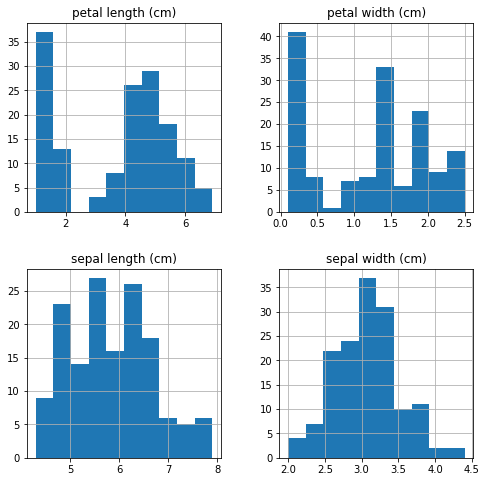

In [2]:
# Load dataset and display distribution
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
display(df.head())
df.hist(figsize=(8, 8))

# Preprocess using prepnet
The Series wise converters are numerical normalization or NaN imputation or others.
There are always keep original columns and indices.
The Frame wise converters change columns and indices.

Almost conversion can directly invoke from FunctionalContext.
But, converters of changing indices cannot directly invoke from FunctionalContext.
In this case conversions need to invoke FunctionalContext.post accessor.
This accessor always run after other converters.



In [4]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
134,0.309959,-1.049251,1.043450,0.263260,virginica
50,1.396829,0.327318,0.533621,0.263260,versicolor
70,0.068433,0.327318,0.590269,0.788031,versicolor
84,-0.535384,-0.131539,0.420326,0.394453,versicolor
44,-0.897674,1.703886,-1.052513,-1.048667,setosa
119,0.189196,-1.966964,0.703564,0.394453,virginica
125,1.638355,0.327318,1.270040,0.788031,virginica
33,-0.414621,2.509179,-1.335752,-1.311052,setosa
122,2.242172,-0.590395,1.666574,1.050416,virginica
51,0.672249,0.327318,0.420326,0.394453,versicolor


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF5F4AF8C8>,
      dtype=object)

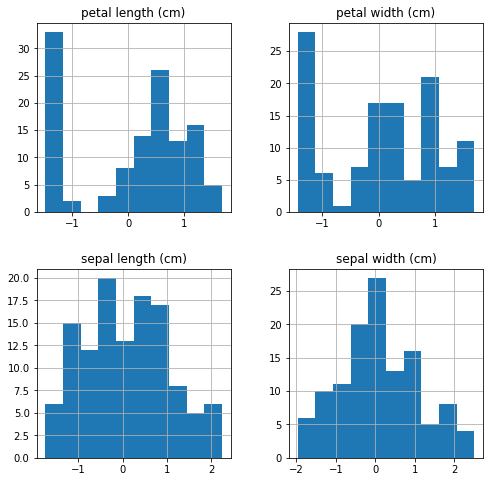

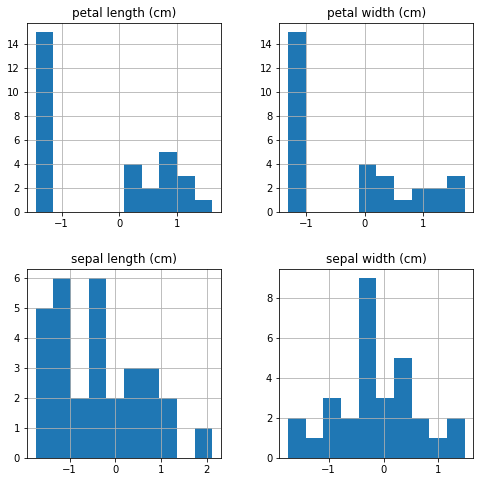

In [3]:
context = prepnet.FunctionalContext()
with context.enter('normalize'):
    context[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
    ].standardize()
with context.enter('outlier-process'):
    context[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
    ].quantile_round(0.99)
with context.enter('post'):
    context.split(5)

preprocessed_df_list = list(context.encode(df))
train_df = pd.concat(preprocessed_df_list[:4], axis=0)
test_df = preprocessed_df_list[-1]
display(train_df.head(10))
train_df.hist(figsize=(8, 8))
test_df.hist(figsize=(8, 8))

# Training and display predictions
This 

In [4]:
# Training SVM multi-classification using one vs rest
from sklearn.metrics import accuracy_score
target_columns = 'target'

classifier = SVC(degree=3)
classifier.fit(train_df.drop(columns=target_columns), train_df[target_columns])
train_pred_labels = classifier.predict(train_df.drop(columns=target_columns))

print(f'Accuracy: {accuracy_score(train_df[target_columns], train_pred_labels):.3f}')
display(pd.crosstab(
    train_df[target_columns].reset_index(drop=True), 
    pd.Series(train_pred_labels, name='pred')
))

Accuracy: 0.983


pred,setosa,versicolor,virginica
target,,,
setosa,35,0,0
versicolor,0,42,1
virginica,0,1,41


In [5]:
test_pred_labels = classifier.predict(test_df.drop(columns=target_columns))

print(f'Accuracy: {accuracy_score(test_df[target_columns], test_pred_labels):.3f}')
display(pd.crosstab(
    test_df[target_columns].reset_index(drop=True), 
    pd.Series(test_pred_labels, name='pred')
))

Accuracy: 0.900


pred,setosa,versicolor,virginica
target,,,
setosa,14,1,0
versicolor,0,6,1
virginica,0,1,7


# Disable normalize and compare accuracy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
15,5.7,4.151,1.5,0.4,setosa
1,4.9,3.000,1.4,0.2,setosa
51,6.4,3.200,4.5,1.5,versicolor
101,5.8,2.700,5.1,1.9,virginica
145,6.7,3.000,5.2,2.3,virginica
111,6.4,2.700,5.3,1.9,virginica
108,6.7,2.500,5.8,1.8,virginica
104,6.5,3.000,5.8,2.2,virginica
112,6.8,3.000,5.5,2.1,virginica
83,6.0,2.700,5.1,1.6,versicolor


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF5F8AF208>,
      dtype=object)

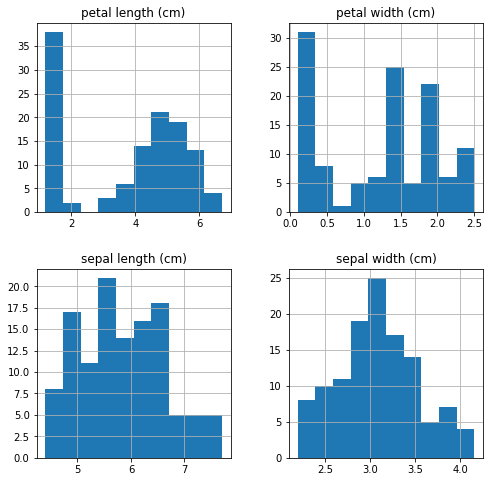

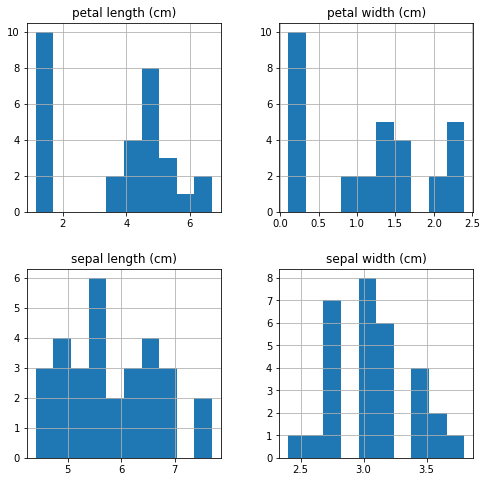

In [6]:
context2 = context.disable('normalize')
preprocessed_df_list = list(context2.encode(df))
train_df = pd.concat(preprocessed_df_list[:4], axis=0)
test_df = preprocessed_df_list[-1]
display(train_df.head(10))
train_df.hist(figsize=(8, 8))
test_df.hist(figsize=(8, 8))

In [7]:
# Training SVM multi-classification using one vs rest
from sklearn.metrics import accuracy_score
target_columns = 'target'

classifier = SVC(degree=3)
classifier.fit(train_df.drop(columns=target_columns), train_df[target_columns])
train_pred_labels = classifier.predict(train_df.drop(columns=target_columns))

print(f'Train Accuracy: {accuracy_score(train_df[target_columns], train_pred_labels):.3f}')
display(pd.crosstab(
    train_df[target_columns].reset_index(drop=True), 
    pd.Series(train_pred_labels, name='pred')
))

test_pred_labels = classifier.predict(test_df.drop(columns=target_columns))

print(f'Test Accuracy: {accuracy_score(test_df[target_columns], test_pred_labels):.3f}')
display(pd.crosstab(
    test_df[target_columns].reset_index(drop=True), 
    pd.Series(test_pred_labels, name='pred')
))

Train Accuracy: 0.967


pred,setosa,versicolor,virginica
target,,,
setosa,40,0,0
versicolor,0,34,3
virginica,0,1,42


Test Accuracy: 0.967


pred,setosa,versicolor,virginica
target,,,
setosa,10,0,0
versicolor,0,12,1
virginica,0,0,7
